# Credit Card Fraud LinReg

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import matplotlib.pyplot as plt
import pygam
import matplotlib
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# look at the data

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# lots more non-fraud

df0 = df.loc[df["Class"] == 0]
df1 = df.loc[df["Class"] == 1]

In [4]:
# separate variables from response (classes)

X = df.iloc[:, 0:30]
y = df["Class"]

In [5]:
# Split the sample for a validation test set

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33, random_state = 1)

In [6]:
# Base fraud rate (proportion of fraud from the training data)

base_rate = np.mean(y_train)
base_rate

0.001802746043391678

In [7]:
from sklearn.linear_model import LinearRegression

# C controls the ridge regression penalty

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# intercept in model

lin_reg.intercept_

0.0019641779291793976

In [15]:
lin_reg.coef_

array([-6.58566062e-09, -2.07935083e-03,  2.71192366e-03, -5.30453418e-03,
        3.77545670e-03, -2.58282507e-03, -1.62072997e-03, -6.79367033e-03,
        9.21370647e-04, -3.69891857e-03, -8.23672268e-03,  6.25656702e-03,
       -1.06997998e-02, -2.54056439e-04, -1.32252538e-02, -1.96713535e-04,
       -9.33754291e-03, -1.60615524e-02, -5.56008749e-03,  1.85708986e-03,
        6.80978115e-04,  2.41054310e-03,  9.42724153e-05, -7.33008159e-06,
       -6.13707394e-04,  3.14565505e-04,  3.62272391e-04,  1.86309006e-03,
        1.27306258e-03,  4.47993908e-06])

In [20]:
# 30 coefficients for 30 variables

from scipy import stats

params = np.append(lin_reg.intercept_, lin_reg.coef_)
y_pred = lin_reg.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-y_pred)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, aXis=1)
# MSE = (sum((y-y_pred)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0         0.0020              0.0    11.501          0.000
1        -0.0000              0.0    -4.237          0.000
2        -0.0021              0.0   -58.867          0.000
3         0.0027              0.0    39.559          0.000
4        -0.0053              0.0  -109.047          0.000
5         0.0038              0.0    93.084          0.000
6        -0.0026              0.0   -39.164          0.000
7        -0.0016              0.0   -31.997          0.000
8        -0.0068              0.0   -91.225          0.000
9         0.0009              0.0    19.217          0.000
10       -0.0037              0.0   -74.605          0.000
11       -0.0082              0.0  -156.984          0.000
12        0.0063              0.0   112.333          0.000
13       -0.0107              0.0  -195.687          0.000
14       -0.0003              0.0    -4.677          0.000
15       -0.0132              0.0  -231.845          0.0

In [33]:
# Misclassification rate

y_test_pred = lin_reg.predict(X_test)
y_test_class = np.where(lin_reg.predict(X_test) > 0.5, 1, 0)

lin_misclass_rate = np.mean(y_test_class != y_test)
lin_misclass_rate

0.0011278155489588986

In [29]:
# Just guess everything as 0 missclass rate, not much worse than the model, bad news

np.mean(y_test != 0)

0.0015746858608105376

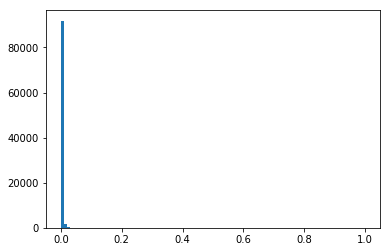

In [41]:
fig, ax = plt.subplots()
ax.hist(y_test_pred, bins = 100)
plt.show()

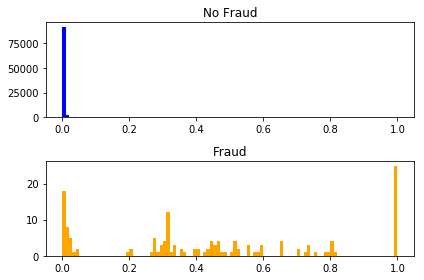

In [46]:
x_range = [np.min(y_test_pred), np.max(y_test_pred)]
colors = ["blue","orange"]
titles = ["No Fraud", "Fraud"]
fig, axs = plt.subplots(nrows = 2)
for i, ax in enumerate(axs):
    ax.hist(y_test_pred[y_test == i],
        bins = 100,
        range = x_range,
        color = colors[i])
    ax.set(title = titles[i])
fig.tight_layout()

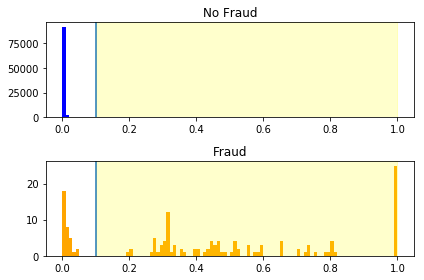

In [45]:
x_range = [np.min(y_test_pred), np.max(y_test_pred)]
colors = ["blue","orange"]
titles = ["No Fraud", "Fraud"]
fig, axs = plt.subplots(nrows = 2)
for i, ax in enumerate(axs):
    ax.hist(y_test_pred[y_test == i],
        bins = 100,
        range = x_range,
        color = colors[i])
    ax.set(title = titles[i])
    ax.axvline(0.1)
    ax.axvspan(0.1,x_range[1], alpha=0.2, color='yellow')
fig.tight_layout()